In [55]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introdução



Os dados se referem a uma amostra coletada em São Paulo em uma área universitária, a faixa etária de idade dos alunos que frequentam a região varia em média entre 18 e 28 anos. Os dados se referem ao consumo de cerveja em determinada região e as temperaturas diárias. Base de dados disponibilizada em: https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

In [56]:
# Importando dataset
my_data = pd.read_csv('Consumo_cerveja.csv', index_col="Data",parse_dates=True)

In [57]:
my_data.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Data,,,,,,
2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [58]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941 entries, 2015-01-01 to NaT
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    object 
 1   Temperatura Minima (C)       365 non-null    object 
 2   Temperatura Maxima (C)       365 non-null    object 
 3   Precipitacao (mm)            365 non-null    object 
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(4)
memory usage: 51.5+ KB


# Visualização de dados

In [59]:
# mudar tipo das colunas de temperatura
my_data['Temperatura Media (C)'] = my_data['Temperatura Media (C)'].str.replace(',', '.').astype(float)
my_data['Temperatura Maxima (C)'] = my_data['Temperatura Maxima (C)'].str.replace(',', '.').astype(float)
my_data['Temperatura Minima (C)'] = my_data['Temperatura Minima (C)'].str.replace(',', '.').astype(float)

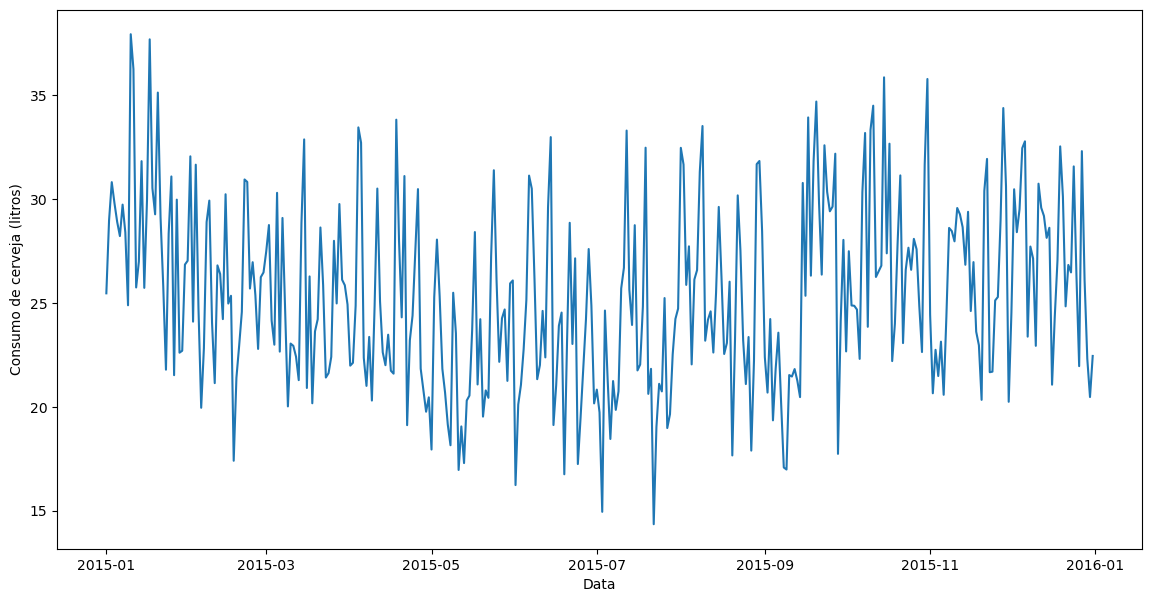

In [5]:
# Line chart
plt.figure(figsize=(14,7))
sns.lineplot(data=my_data['Consumo de cerveja (litros)'])
plt.show()

Bom, conseguimos observar que a nossa base apresenta dados diários de consumo para o ano de 2015, em razão disso, o gráfico fica com bastante informação. Além disso, apresenta muitas oscilações, que talvez se expliquem pelo fato de haver dias de semana e dias de finais de semana. Dias de finais de semana tem maior chance de terem um consumo mais alto de cerveja, do que os dias ‘normais’. Ademais, espera-se que em média as pessoas não possuam um consumo alto de bebida todos os dias.

Observa-se também que o menor dia de consumo está ali entre julho e agosto, o que talvez seja explicado pela temperatura da época e/ou em razão das férias universitárias. Para alguma conclusão nesse sentido precisaríamos de maior investigação. Mas, conseguimos fazer um gráfico também das temperaturas para observar o comportamento.

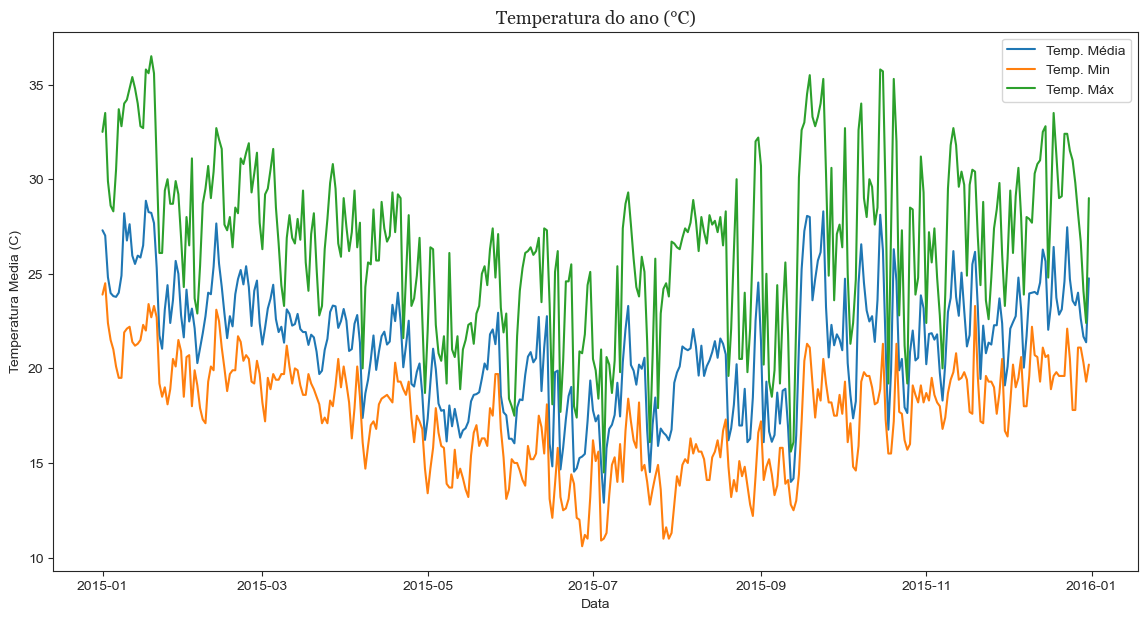

In [67]:
# Line chart
plt.figure(figsize=(14,7))
sns.lineplot(data=my_data['Temperatura Media (C)'])
sns.lineplot(data=my_data['Temperatura Minima (C)'])
sns.lineplot(data=my_data['Temperatura Maxima (C)'])

plt.legend(['Temp. Média', 'Temp. Min', 'Temp. Máx'])
plt.title('Temperatura do ano (°C)', fontdict={'fontsize':13,  'family':'Georgia'});


plt.show()

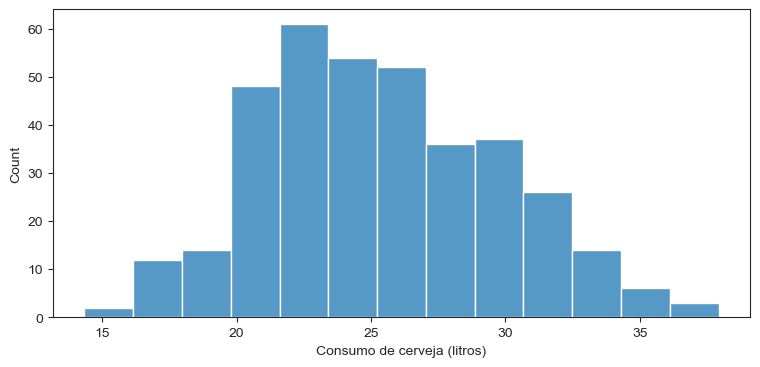

In [34]:
# histogram
plt.figure(figsize=(9,4))
sns.histplot(data = my_data, x = 'Consumo de cerveja (litros)')


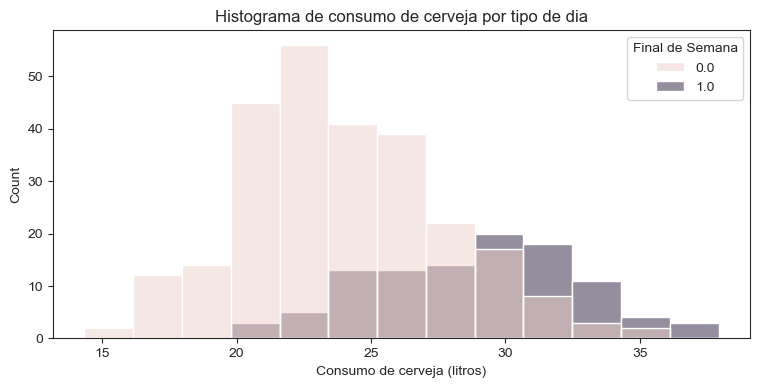

In [40]:
plt.figure(figsize=(9,4))
sns.histplot(data = my_data, x = 'Consumo de cerveja (litros)', hue = 'Final de Semana')

# Adicionar título
plt.title("Histograma de consumo de cerveja por tipo de dia")
plt.show()


Com esse histograma conseguimos ver que o consumo nos dias de finais de semana é maior em litros do que o consumo nos dias normais, porém, a maior contagem de consumo está concentrada ali entre 20L e um pouco mais de 25L devido aos dias normais serem mais frequentes que os dias de finais de semana.

Podemos visualizar as distribuições também utilizando o gráfico de densidade KDE (kernel density estimate). Esse gráfico é bastante útil na análise exploratória de dados, permitindo visualizar a distribuição de variáveis numéricas e entender melhor as variáveis. Com KDE aplica-se uma função para suavizar a distribuição de dados.

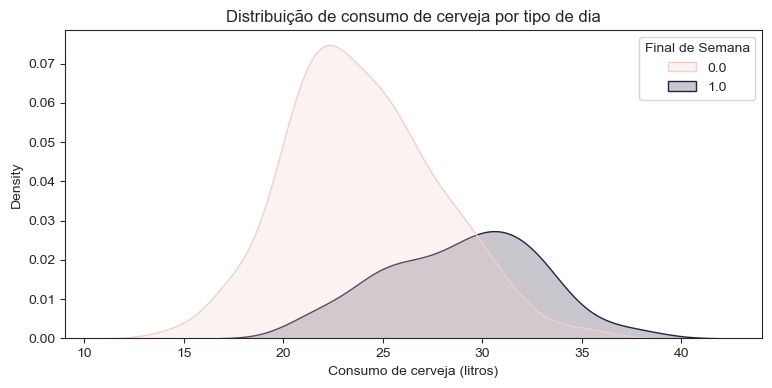

In [41]:
# KDE plots for each species
plt.figure(figsize=(9,4))
sns.kdeplot(data=my_data, x = 'Consumo de cerveja (litros)', hue = 'Final de Semana', shade=True)
plt.title("Distribuição de consumo de cerveja por tipo de dia")
plt.show()

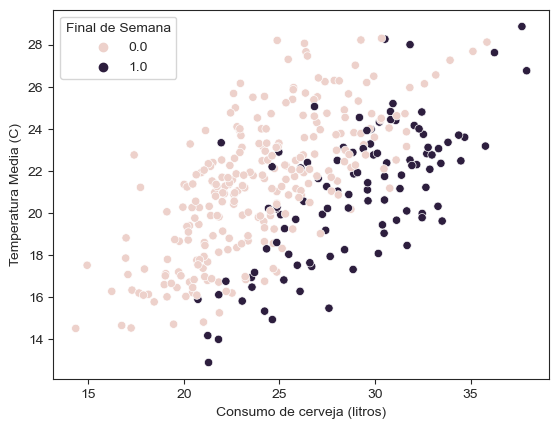

In [76]:
sns.scatterplot(x=my_data['Consumo de cerveja (litros)'], y=my_data['Temperatura Media (C)'], hue = my_data['Final de Semana'])
plt.show()

 O gráfico de dispersão acima sugere que há uma relação positiva entre a temperatura média e o consumo de cerveja.